CNN Model

In [1]:
# Define the path to the dataset
train_dir = r'C:\Users\FOMO\Desktop\MV\Week5\data_mv\train'
test_dir = r'C:\Users\FOMO\Desktop\MV\Week5\data_mv\test'

In [2]:
# Data preprocessing to the split the dataset
from keras.preprocessing.image import ImageDataGenerator

# 仅进行归一化处理
train_datagen = ImageDataGenerator(rescale=1./255)

# 使用 flow_from_directory 方法来读取数据
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (128, 128),
    batch_size= 4,
    class_mode='categorical', 
    color_mode= 'rgb'
)



Found 48 images belonging to 3 classes.


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size= (128, 128),
    batch_size= 4,
    class_mode= 'categorical',
    color_mode= 'rgb' 
)

Found 24 images belonging to 3 classes.


In [4]:
x_train, y_train = train_generator.next()
x_text, y_text = test_generator.next()

In [5]:
# CNN model building
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    Flatten(),
    Dense(500, activation='relu'),
    Dense(250, activation='relu'),
    Dense(3, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 200704)            0

In [11]:
# Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Train the model by fitting the model in data
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 1.0767 - accuracy: 0.3333 - val_loss: 19.8534 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 52ms/step - loss: 7.8109 - accuracy: 0.6667 - val_loss: 3.3885e-04 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 52ms/step - loss: 5.6103 - accuracy: 0.3333 - val_loss: 0.9321 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 53ms/step - loss: 0.4086 - accuracy: 0.6667 - val_loss: 1.1897 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 50ms/step - loss: 0.4832 - accuracy: 0.6667 - val_loss: 0.3598 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 54ms/step - loss: 0.6704 - accuracy: 0.3333 - val_loss: 3.7064 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 54ms/step - loss: 1.2708 - accuracy: 0.6667 - val_loss: 1.0508 - val_accuracy: 0.0000e+00
Epoc

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

6/6 [==============================] - 1s 6ms/step - loss: 6.1310 - accuracy: 0.4583
Test loss: 6.13104248046875
Test accuracy: 0.4583333432674408


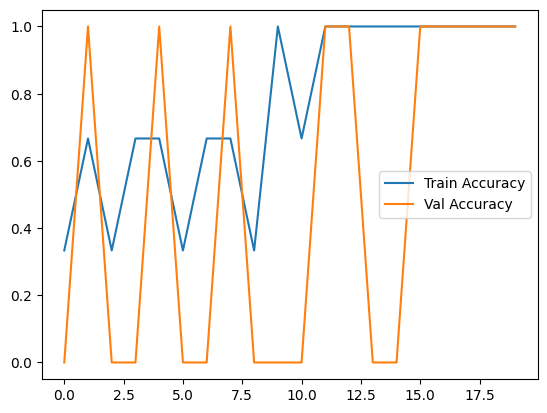

In [14]:
# Visualization
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.legend()
plt.show()
